In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib as mpl
import scipy as sp

In [7]:
import warnings
warnings. filterwarnings('ignore')


In [2]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=['X'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=['Y'])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula('Y ~ X', data = df)
result = model.fit()

In [3]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [4]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 02 Feb 2022   Prob (F-statistic):           6.60e-24
Time:                        19:52:48   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

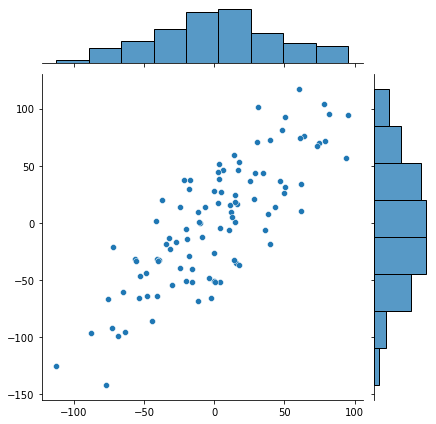

In [8]:
sns.jointplot(result.fittedvalues, y)
plt.show()

## 상수항이 없는 모형의 경우

In [10]:
X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, bias=100, coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=['X'])
dfy = pd.DataFrame(y, columns=['Y'])
df = pd.concat([dfX, dfy], axis=1)

model2 = sm.OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

In [11]:
result2.rsquared

0.18768724705943896

## F 검정을 이용한 모형 비교

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=['MEDV'])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [15]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11081.363952,0.0,NaN,NaN,NaN
1,492.0,11078.784578,2.0,2.579374,0.057274,0.944342


## F 검정을 사용한 변수 중요도 비교

In [17]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11078.784578,1.0,243.219699,10.801193,0.001087


In [18]:
model_boston = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,243.219699,1.0,10.801193,1.086810e-03
ZN,257.492979,1.0,11.435058,7.781097e-04
INDUS,2.516668,1.0,0.111763,7.382881e-01
NOX,487.155674,1.0,21.634196,4.245644e-06
RM,1871.324082,1.0,83.104012,1.979441e-18
AGE,0.061834,1.0,0.002746,9.582293e-01
DIS,1232.412493,1.0,54.730457,6.013491e-13
RAD,479.153926,1.0,21.278844,5.070529e-06
TAX,242.257440,1.0,10.758460,1.111637e-03
PTRATIO,1194.233533,1.0,53.034960,1.308835e-12
